# Decision Tree Classification

Using Logistic Regression it is easy to draw boundaries/classify in below shown data:
   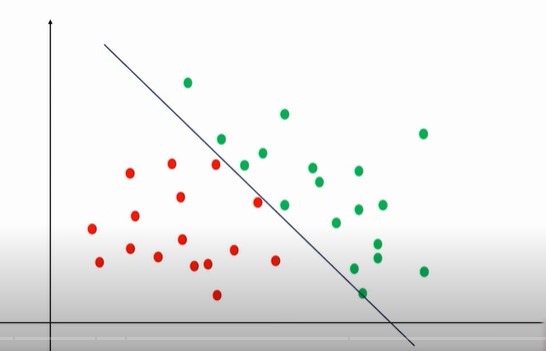 

What if the data is of this type: 
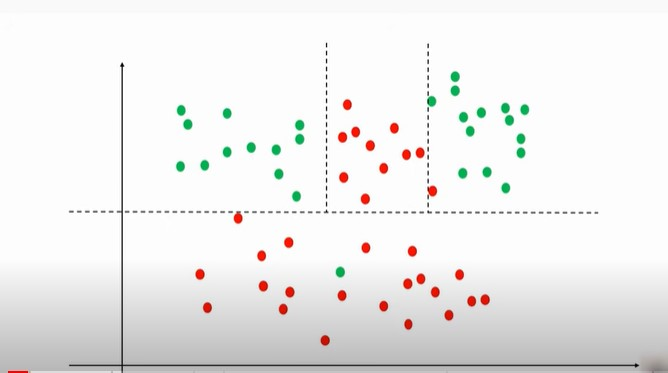

Answer is: Use Descision Tree Classifier

This is our dataset: 
   
  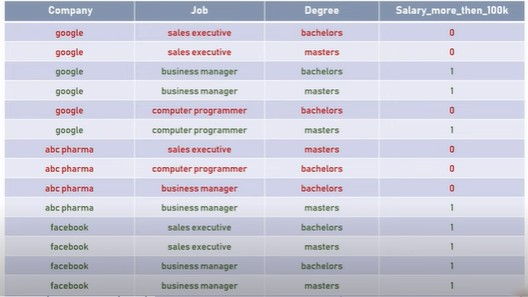
  
  We have to build a model which will classify persons having salary >100K and predict later on.

# Possible ways to do so:Creation of Decision Tree
   

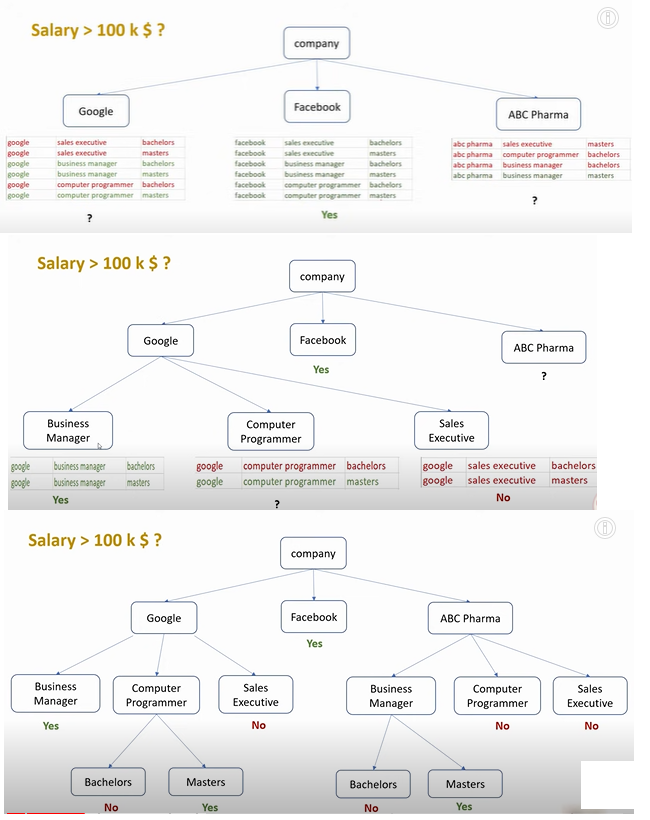

# How do you select ordering of features(Splitting Criteria)?

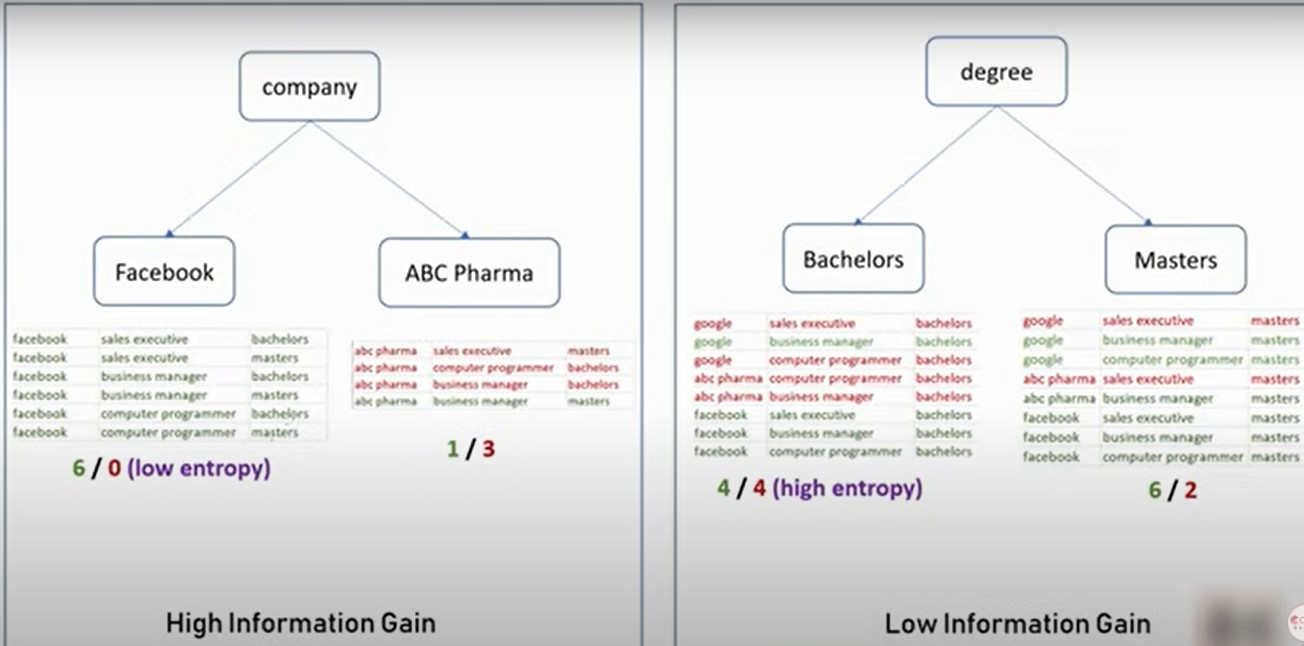

Criteria 1: Low Entropy (Basis of measurement of randomness in our sample), High Information Gain
 "Homogeneous within , Hetrogeneous Across"


# Criteria 1: Information Gain: Mathematics Behind


Simply put information gain is the measure of amount of information required for explaining a cluster of data having multiple classes. Entropy, according to information theory is the amount of disorganisation in a system. 
                            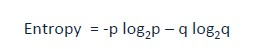
Here p & q are probability of the two classes.

Information Gain = 1 - Entropy
Split will happen by the variable with high information gain and by the formula low Entropy values


# Criteria 2: Gini Impurity/Gini : Mathematics Behind

Gini says, if we select two items from a population at random then they must be of same class and probability for this is 1 if population is pure.
                                                        P * P + Q*Q
                                                            
    1.	It works with categorical target variable “Success” or “Failure”.
    2.	It performs only Binary splits
    3.	Higher the value of Gini higher the homogeneity.
    4.	CART (Classification and Regression Tree) uses Gini method to create binary splits.
    
                Gini Impurity = 1-Gini
                
   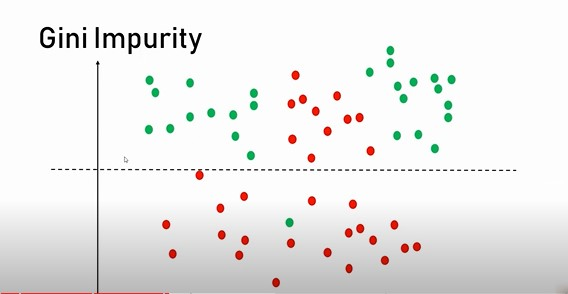


## Importing the libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [22]:
dataset = pd.read_csv('salaries.csv')
print(dataset.head())


  company                  job     degree  salary_more_then_100k
0  google      sales executive  bachelors                      0
1  google      sales executive    masters                      0
2  google     business manager  bachelors                      1
3  google     business manager    masters                      1
4  google  computer programmer  bachelors                      0


In [23]:
X = dataset.drop('salary_more_then_100k',axis='columns')
y = dataset['salary_more_then_100k']
print(X)
y

       company                  job     degree
0       google      sales executive  bachelors
1       google      sales executive    masters
2       google     business manager  bachelors
3       google     business manager    masters
4       google  computer programmer  bachelors
5       google  computer programmer    masters
6   abc pharma      sales executive    masters
7   abc pharma  computer programmer  bachelors
8   abc pharma     business manager  bachelors
9   abc pharma     business manager    masters
10    facebook      sales executive  bachelors
11    facebook      sales executive    masters
12    facebook     business manager  bachelors
13    facebook     business manager    masters
14    facebook  computer programmer  bachelors
15    facebook  computer programmer    masters


0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

# Encoding our text data to numbers

In [25]:
from sklearn.preprocessing import LabelEncoder
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [27]:
X['company_n'] = le_company.fit_transform(X['company'])
X['job_n'] = le_job.fit_transform(X['job'])
X['degree_n'] = le_degree.fit_transform(X['degree'])
X

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [29]:
X_encoded = X.drop(['company','job','degree'],axis='columns')
X_encoded

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


## Splitting the dataset into the Training set and Test set

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size = 0.25, random_state = 0)

## Training the Decision Tree Classification model on the Training set

In [33]:
from sklearn.tree import DecisionTreeClassifier
#classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

## Predicting the Test set results

In [36]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 0, 0], dtype=int64)

## Making the Confusion Matrix and finding the accuracy

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

#Accuracy
classifier.score(X_test,y_test)

[[2 1]
 [1 0]]


0.5

    Is salary of Google, Computer Engineer, Bachelors degree > 100 k ?

In [41]:
classifier.predict([[2,1,0]])

array([0], dtype=int64)

## Visualising the Decision Tree formation

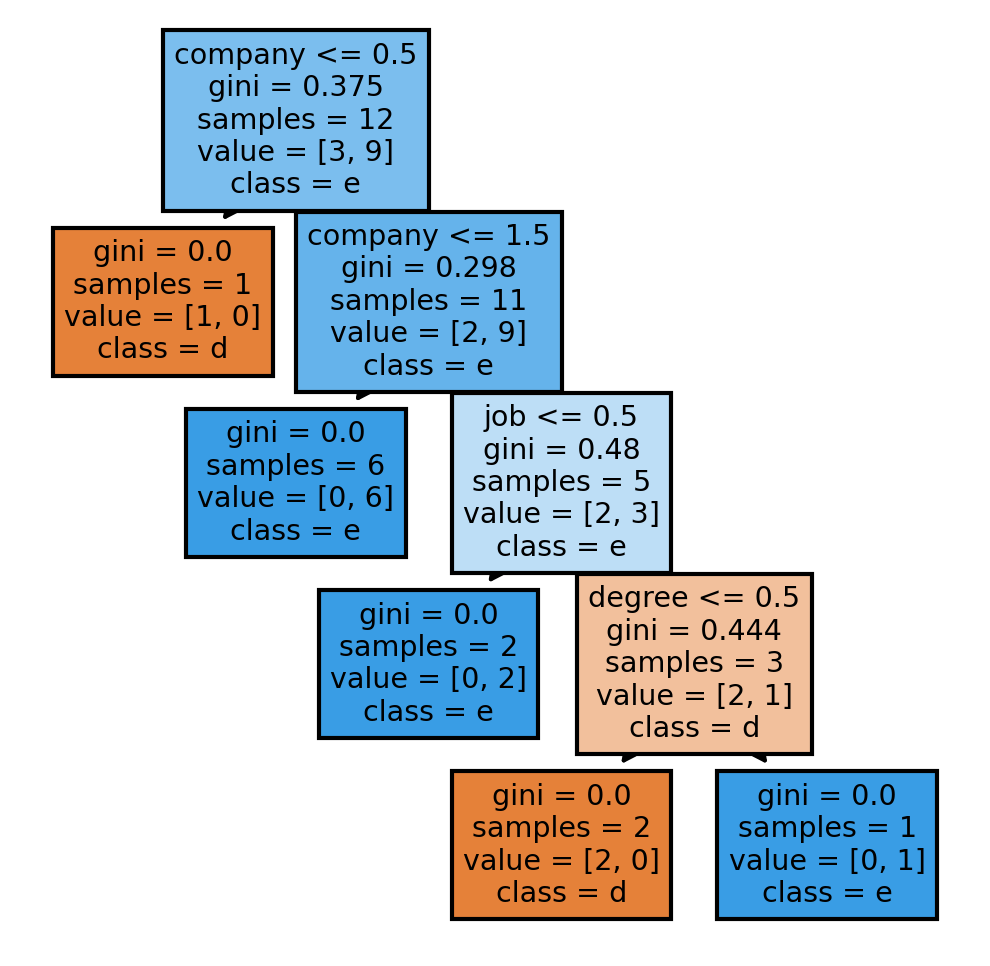

In [49]:
from sklearn import tree
import matplotlib.pyplot as plt

features = X.columns[:-1]

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

tree.plot_tree(classifier,feature_names = features,class_names=X.columns[-1],
           filled = True, impurity=True);

fig.savefig('imagename.png')